In [1]:
%mathplotlib inline

UsageError: Line magic function `%mathplotlib` not found.


In [8]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys
import scipy.special
import scipy.ndimage
import scipy.signal
from random import *

In [9]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 31s 3us/step


0


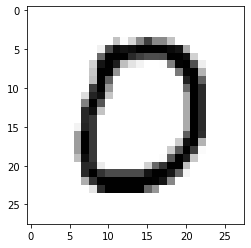

In [42]:
n=10
#print(y_train[n])
plt.imshow((255-x_test[n])/255, cmap = "gray")
print(test(n).argmax())

In [111]:
def image_to_feature_vector(image, size=(28, 28)):
    return cv2.resize(image, size)

In [112]:
image = mpimg.imread(r"C:\Users\annn\Desktop\Education\Unity\image.png")
image1 = image_to_feature_vector(image)
query_vec = np.array(1-image1).reshape(784)
plt.imshow(image, cmap="gray")
myNN.query(query_vec).argmax()

NameError: name 'cv2' is not defined

In [104]:
class MyNN:
    def __init__(self, rate, inputs, hiddens, outputs):
        self.i_count=inputs+1
        self.h_count=hiddens
        self.o_count=outputs
        #Заполняем массивы весов рандомом
        self.w_ih = np.random.normal(0.0, pow(self.h_count, -0.5),(self.h_count, self.i_count))
        self.w_ho = np.random.normal(0.0, pow(self.o_count, -0.5),(self.o_count, self.h_count))
        #learning rate and sigmoid
        self.ir = rate
        self.activation_function = lambda x: scipy.special.expit(x)
        
    def train(self, inputs_list, targets_list):
        inputs_list = np.concatenate((inputs_list,[1]), axis = 0)
        #вектор-столбцы входных данных и правильных ответов
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        #direct disappear
        hid_results = self.activation_function(np.dot(self.w_ih, inputs))
        out_results = self.activation_function(np.dot(self.w_ho, hid_results))
        #output errors
        out_errors = (targets - out_results)
        #errors of hidden layer
        hid_errors = np.dot(self.w_ho.T, out_errors)
        #corrections for weights hidden - output
        self.w_ho += self.ir * np.dot(out_errors*out_results*(1.0-out_results),np.transpose(hid_results))
        #corrections for weights hidden - put
        self.w_ih += self.ir * np.dot(hid_errors*hid_results*(1.0-hid_results),np.transpose(inputs))
    def query(self, inputs_list):
        inputs_list= np.concatenate((inputs_list,[1]), axis = 0)
        #vector-column input data
        inputs = np.array(inputs_list, ndmin=2).T
        #direct disappear
        hid_results = self.activation_function(np.dot(self.w_ih, inputs))
        out_results = self.activation_function(np.dot(self.w_ho, hid_results))
        return out_results
    
    def set_ir(self, rate):
        self.ir = rate
        
        

In [27]:
myNN = MyNN(0.1, 784, 100, 10)

In [28]:
def train(n):
    target = np.zeros(10)
    target[y_train[n]] = 1
    query = np.array(x_train[n]/255).reshape(784)
    myNN.train(query, target)

In [79]:
def trainR(n):
    target = np.zeros(10)
    rot = random()*30-15
    imageR = scipy.ndimage.rotate(x_train[n]/255,rot,cval=0,reshape = False)
    query = np.array(imageR).reshape(784)
    myNN.train(query, target)

In [50]:
def test(n):
    query = np.array(x_test[n]/255).reshape(784)
    return myNN.query(query)
    

In [45]:
def test_t(n):
    query = np.array(x_train[n]/255).reshape(784)
    return myNN.query(query)

In [85]:
def epoh_train():
    myNN.set_ir(0.001)
    x_train_len = len(x_train)
    for n in range(x_train_len):
        trainR(n)
        if (n%100==0):
            sys.stdout.write("Row: %s\r" % n)
            sys.stdout.flush()

In [86]:
epoh_train()

In [59]:
def epoch_test_t():       
    x_test_len = len(x_train)
    precision=0
    for n in range(x_test_len):
        ans = test_t(n)
        if (ans.argmax()==y_train[n]):
            precision+=1
    return precision/(n+1)

In [60]:
def epoch_test():       
    x_test_len = len(x_test)
    precision=0
    for n in range(x_test_len):
        ans = test(n)
        if (ans.argmax()==y_test[n]):
            precision+=1
    return precision/(n+1)

In [77]:
def epoch_test_draw():       
    x_test_len = len(x_test)
    precision=0
    for n in range(x_test_len):
        ans = test(n)
        if (ans.argmax()==y_test[n]):
            precision+=1
        else:
            plt.imshow((255-x_test[n])/255, cmap = "gray")
            plt.pause(0.1)
            print('NN: ' + str(ans.argmax())+': '+str(ans.max()))
    return x_test_len-precision

In [87]:
print(epoch_test())
print(epoch_test_t())

0.7222
0.7292166666666666


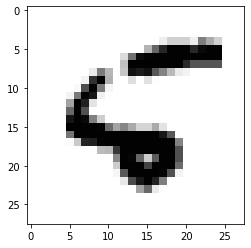

NN: 6: 0.6065720016768613


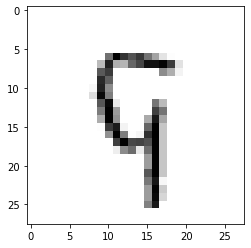

NN: 5: 0.36696920892735535


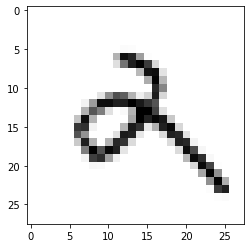

NN: 4: 0.09372325863438437


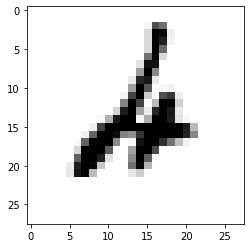

NN: 6: 0.8167333859148483


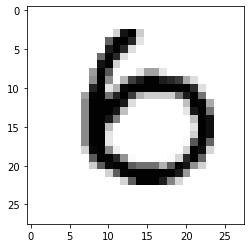

NN: 0: 0.9781132511252916


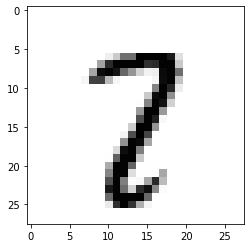

NN: 7: 0.846656151128498


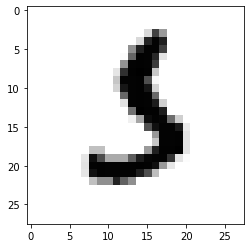

NN: 3: 0.9398632654625555


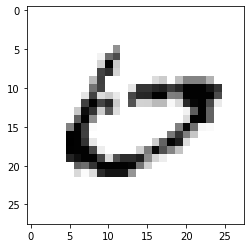

NN: 0: 0.9494099096049123


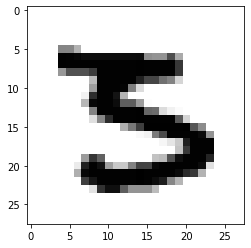

NN: 5: 0.9103568202965463


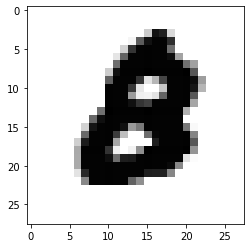

NN: 0: 0.6511125778382167


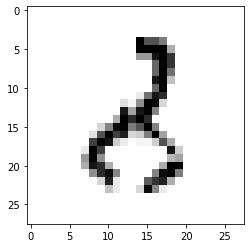

NN: 2: 0.6199362530453647


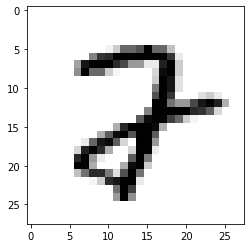

NN: 7: 0.3565528102100444


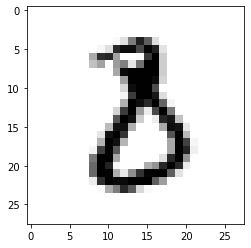

NN: 3: 0.2603201463369795


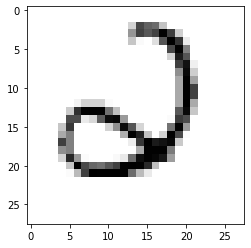

NN: 6: 0.4804221126420434


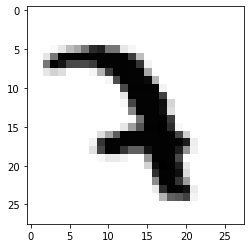

NN: 3: 0.6329478600133379


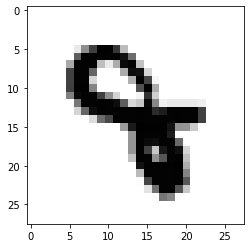

NN: 4: 0.9843688257116088


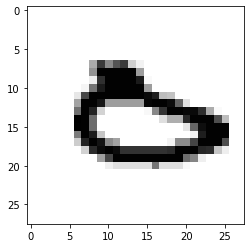

NN: 6: 0.11618713060566183


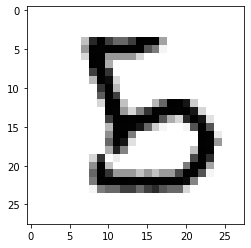

NN: 8: 0.6814510664851131


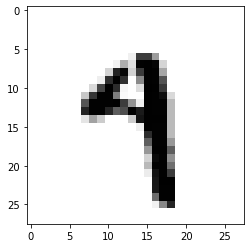

NN: 9: 0.7389383145115697


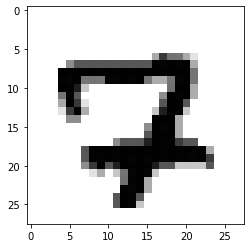

NN: 2: 0.30974377133247294


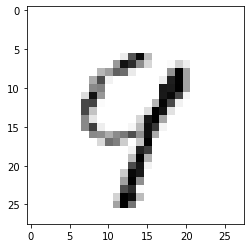

NN: 7: 0.09421441320055249


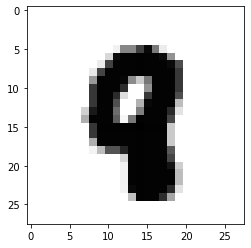

NN: 9: 0.9314553010559622


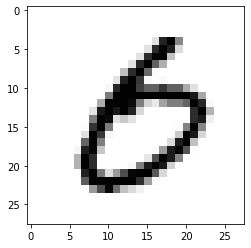

NN: 0: 0.6714897913637992


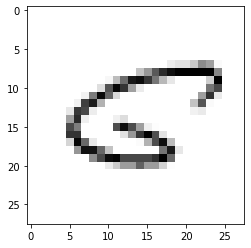

NN: 5: 0.9717557190826969


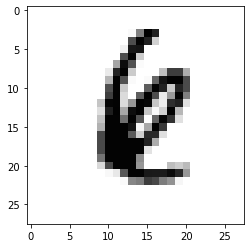

NN: 4: 0.12369202580739377


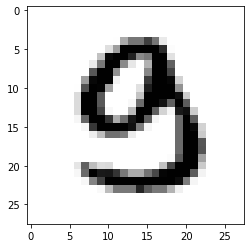

NN: 3: 0.9373687250670011


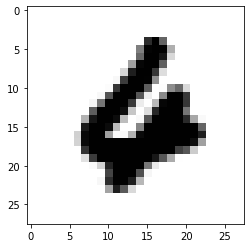

NN: 6: 0.8497821303856511


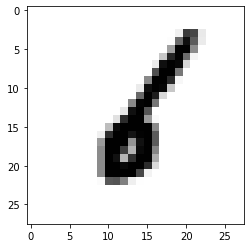

NN: 1: 0.7441536009667663


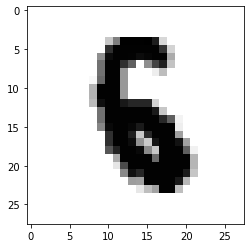

NN: 8: 0.8806690387129175


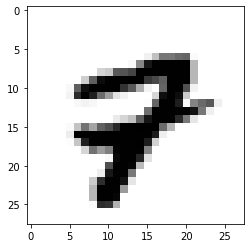

NN: 9: 0.4287633215729425


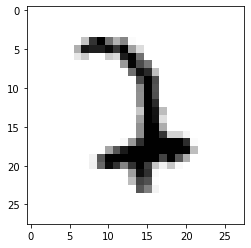

NN: 2: 0.3753177758767745


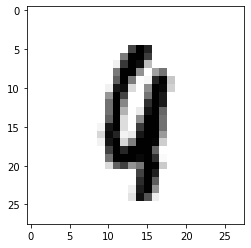

NN: 4: 0.8546056507805264


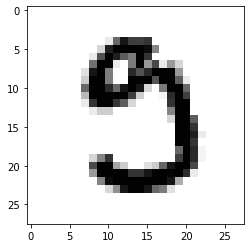

NN: 3: 0.8176115485691193


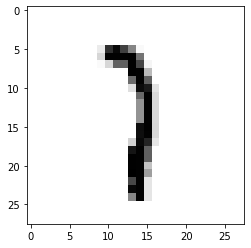

NN: 1: 0.7913953381125857


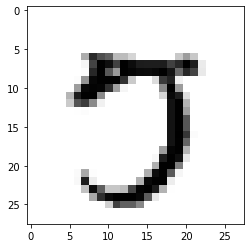

NN: 7: 0.46828278468462337


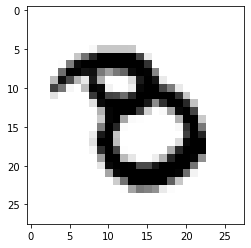

NN: 3: 0.665272819312383


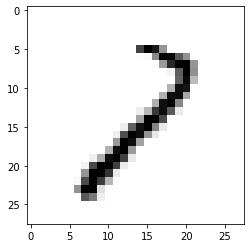

NN: 1: 0.1187390386910376


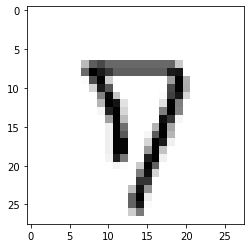

NN: 8: 0.18133760188964534


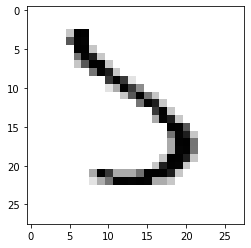

NN: 3: 0.9783744621684366


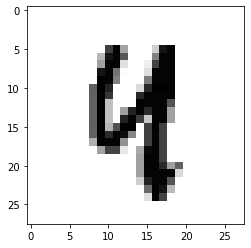

NN: 9: 0.33829635202716196


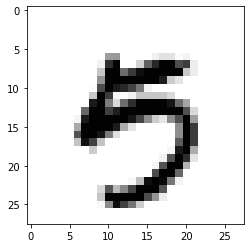

NN: 9: 0.5974907527702489


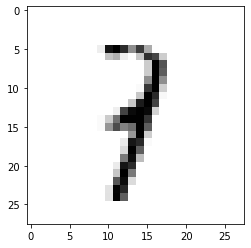

NN: 1: 0.4288157853618497


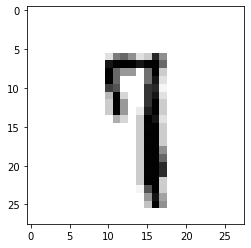

NN: 9: 0.19835960320652268


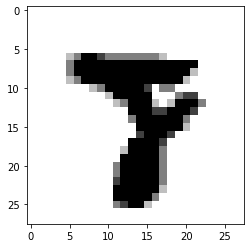

NN: 7: 0.8848058817939738


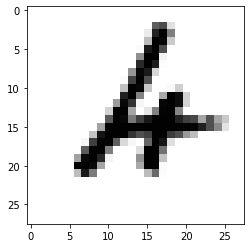

NN: 6: 0.9824453552939876


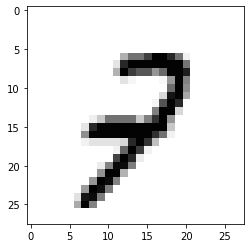

NN: 9: 0.9300556776287541


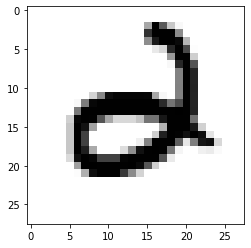

NN: 6: 0.7827869289186994


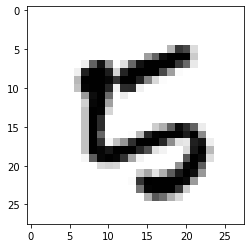

NN: 6: 0.3656076808458425


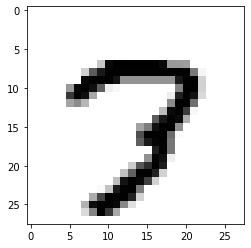

NN: 7: 0.7724479278380839


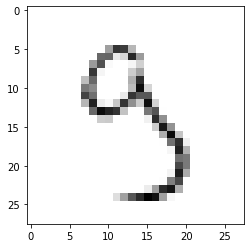

NN: 3: 0.970210784222916


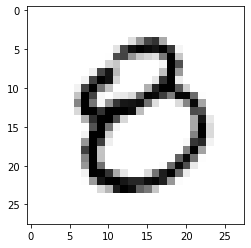

NN: 0: 0.7961228666906094


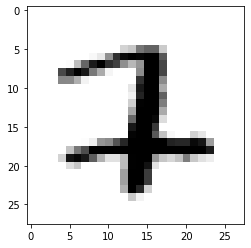

NN: 3: 0.4049723768292841


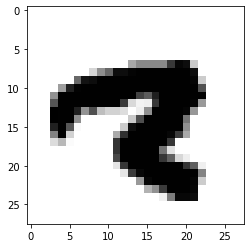

NN: 8: 0.7345574461800586


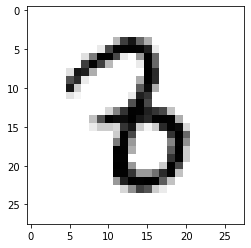

NN: 3: 0.785873004112371


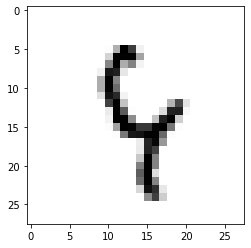

NN: 4: 0.8607470737687495


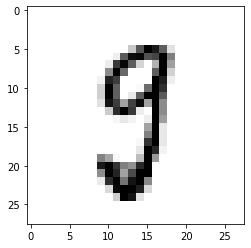

NN: 8: 0.42990216815743426


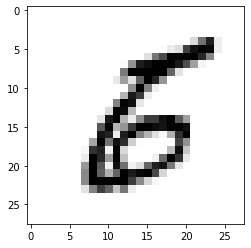

NN: 5: 0.8172606924550726


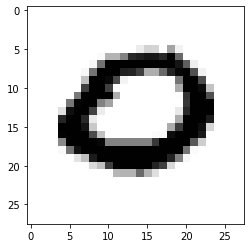

NN: 9: 0.807142008276239


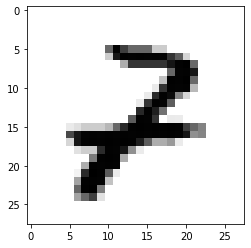

NN: 2: 0.661270703940954


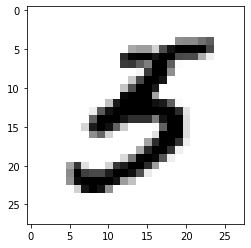

NN: 3: 0.28553392629302665


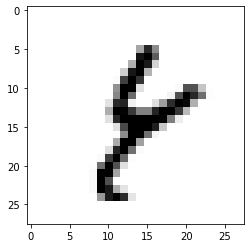

NN: 8: 0.92251857875987


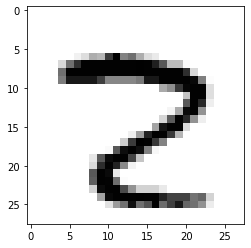

NN: 7: 0.945321221470202


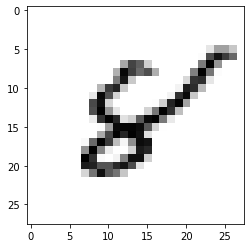

NN: 4: 0.7424331445331088


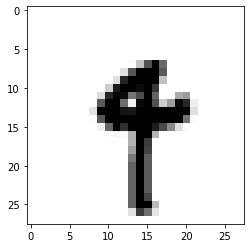

NN: 9: 0.6436417399106941


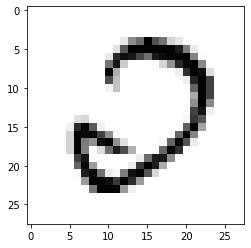

NN: 0: 0.9762347459787349


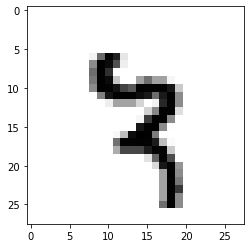

NN: 9: 0.24748935564060473


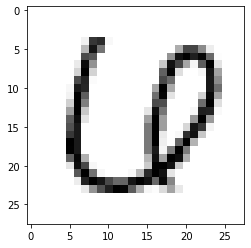

NN: 0: 0.10241723186251535


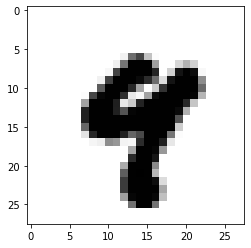

NN: 9: 0.8829226937313854


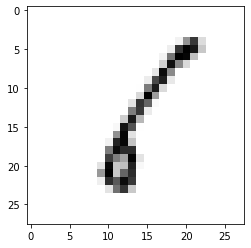

NN: 1: 0.8323194390011641


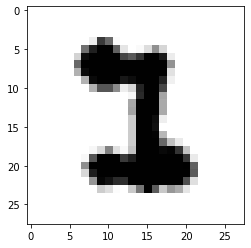

NN: 2: 0.7495420096805931


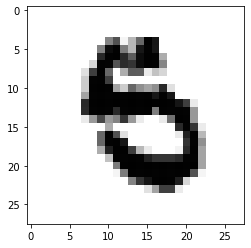

NN: 8: 0.3932244775869153


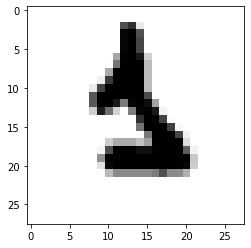

NN: 3: 0.19267008615589817


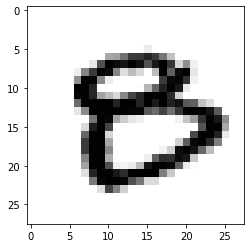

NN: 0: 0.9865463086715252


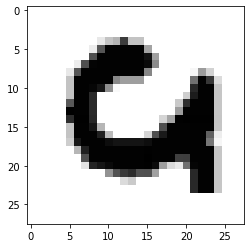

NN: 6: 0.1656490375854591


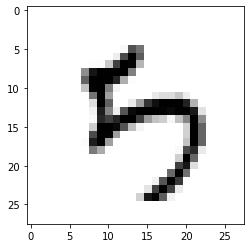

NN: 9: 0.25940346019330873


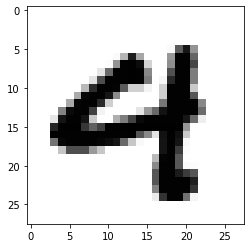

NN: 9: 0.864655188163354


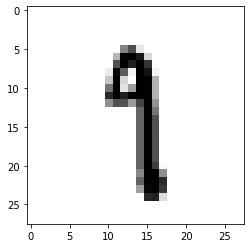

NN: 1: 0.6726584401430783


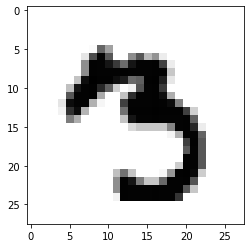

NN: 9: 0.9382545642909164


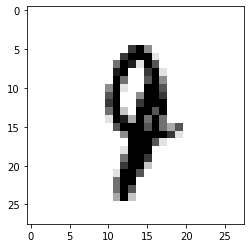

NN: 4: 0.8913714983136968


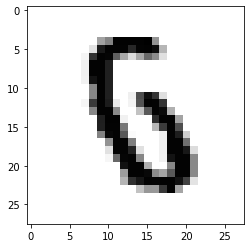

NN: 8: 0.27154972627278057


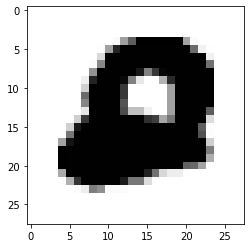

NN: 0: 0.9189883878197761


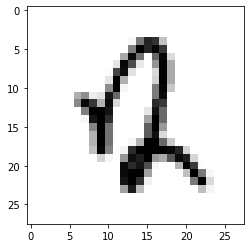

NN: 4: 0.9330449496331399


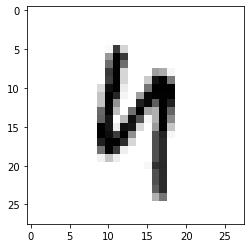

NN: 9: 0.8730702639406258


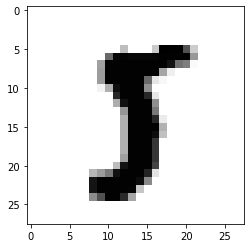

NN: 8: 0.9327525432370339


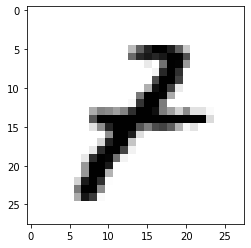

NN: 3: 0.1254928248933998


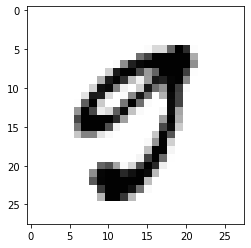

NN: 0: 0.6159928742522062


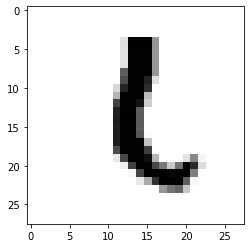

NN: 1: 0.9706165261424037


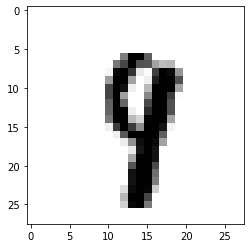

NN: 4: 0.8118750199987114


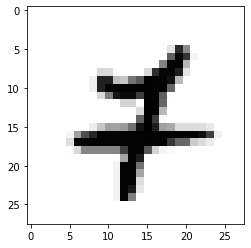

NN: 4: 0.4203000351837297


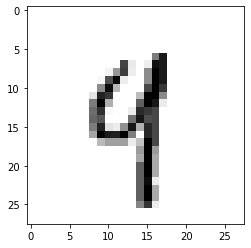

NN: 9: 0.20677489853229344


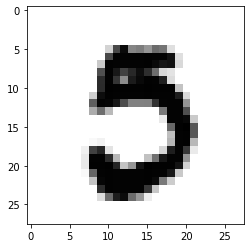

NN: 3: 0.9060342309138038


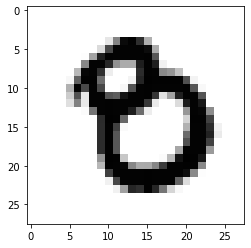

NN: 0: 0.9164702644132988


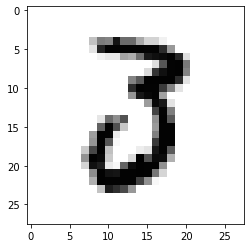

NN: 2: 0.6358543408399207


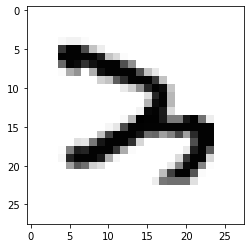

NN: 2: 0.9924672711396405


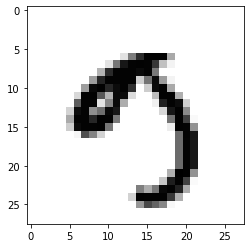

NN: 7: 0.5986738735456272


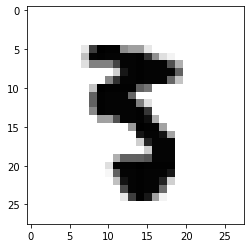

NN: 5: 0.1618996393712002


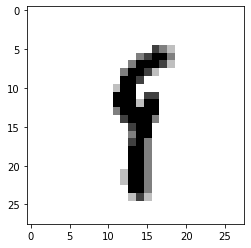

NN: 1: 0.9238315130549701


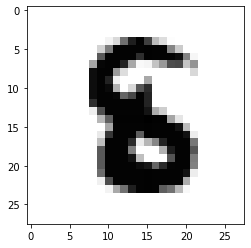

NN: 5: 0.8298191601765649


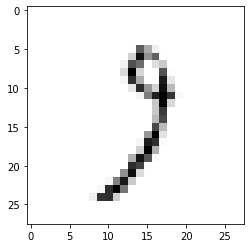

NN: 7: 0.4183132586378768


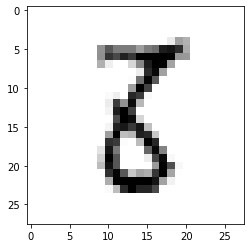

NN: 5: 0.02590969528825749


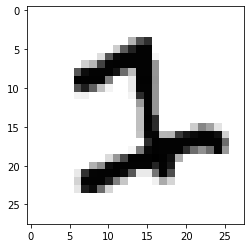

NN: 2: 0.9433613483391704


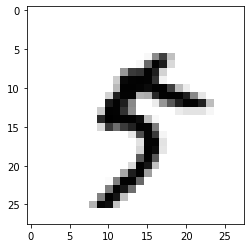

NN: 9: 0.9601520292475392


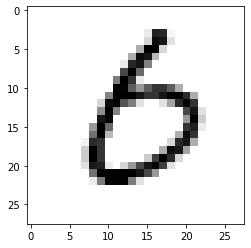

NN: 5: 0.22689658245739702


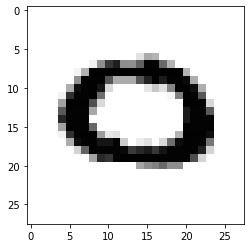

NN: 9: 0.8671481946090817


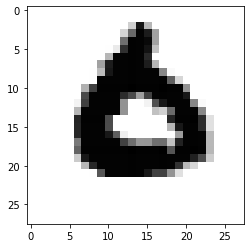

NN: 0: 0.864431882974999


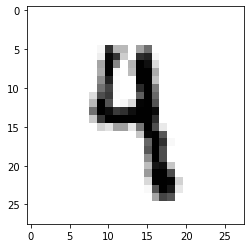

NN: 9: 0.7645310080857809


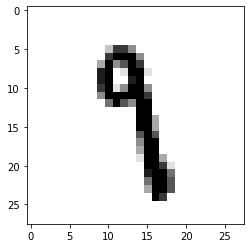

NN: 1: 0.838183577092802


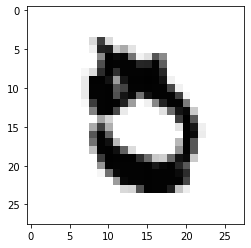

NN: 0: 0.8914170552071115


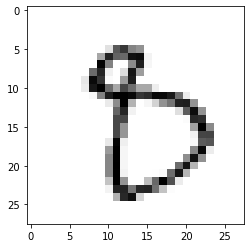

NN: 0: 0.23359005615715053


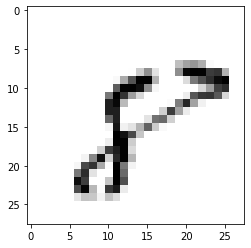

NN: 5: 0.9944646016550645


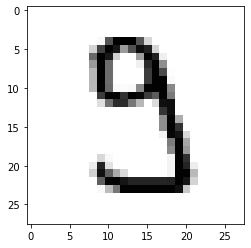

NN: 3: 0.9058318686856839


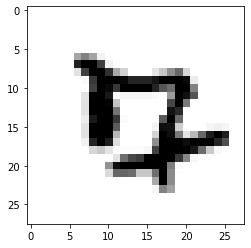

NN: 4: 0.6143710809189614


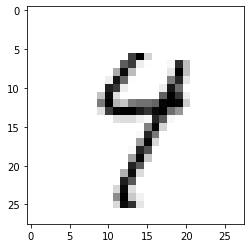

NN: 9: 0.9865218538386823


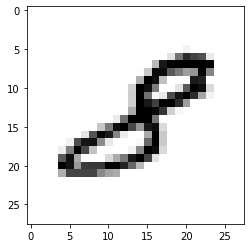

NN: 3: 0.5819253556783046


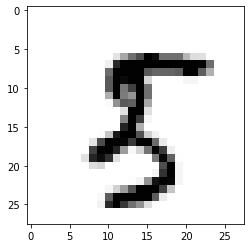

NN: 8: 0.8913445340071178


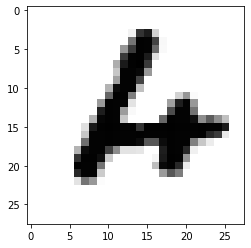

NN: 6: 0.46161327029741533


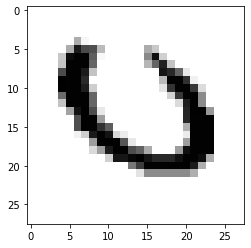

NN: 6: 0.4460618048832443


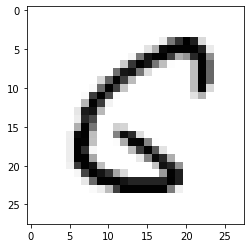

NN: 5: 0.5351997446605727


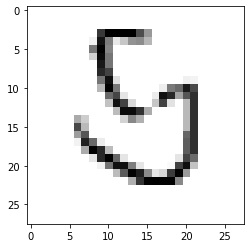

NN: 6: 0.5632567508482273


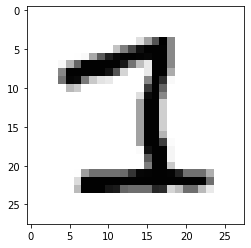

NN: 3: 0.9792240729748356


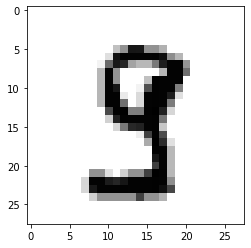

NN: 3: 0.9669898238673849


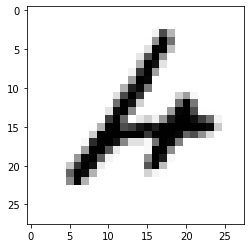

NN: 6: 0.9910578421632961


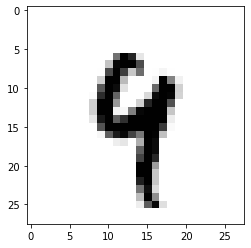

NN: 4: 0.9389039839379714


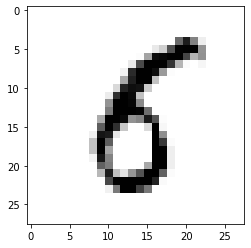

NN: 5: 0.6306699827670376


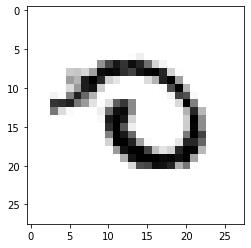

NN: 8: 0.008633859255557201


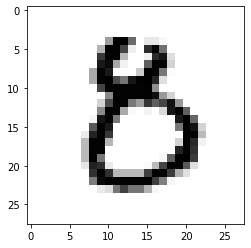

NN: 0: 0.5300600410310289


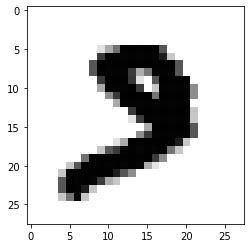

NN: 3: 0.8905106457124964


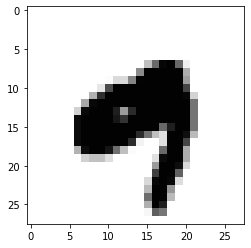

NN: 4: 0.6496767218766758


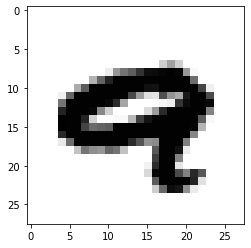

NN: 4: 0.8143201540189167


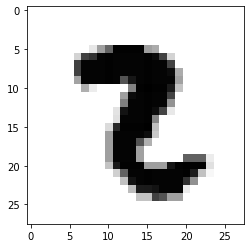

NN: 8: 0.8531117613216572


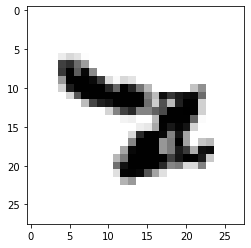

NN: 7: 0.42037232603995883


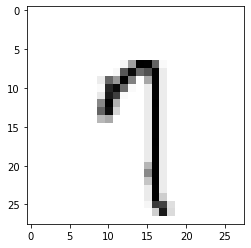

NN: 9: 0.5844268250618938


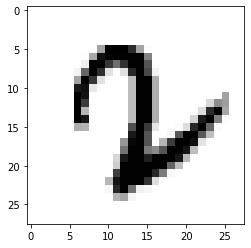

NN: 3: 0.29125712395113373


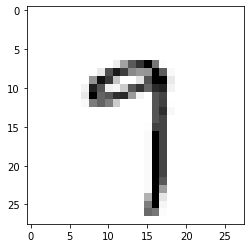

NN: 7: 0.7427362213735902


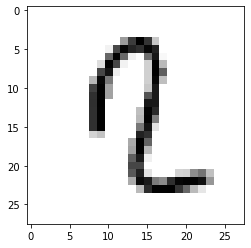

NN: 8: 0.9781862588703009


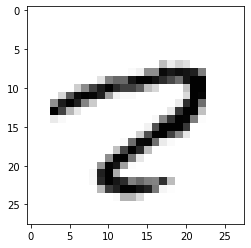

NN: 7: 0.8931499223717885


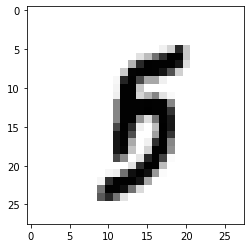

NN: 8: 0.11414560121626997


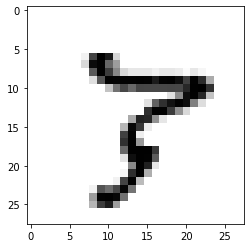

NN: 7: 0.5372889455513424


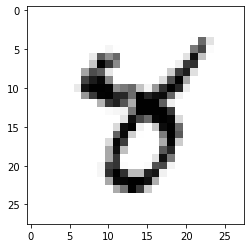

NN: 7: 0.06123396460505327


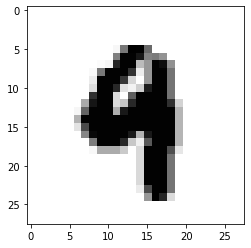

NN: 4: 0.8981954311409507


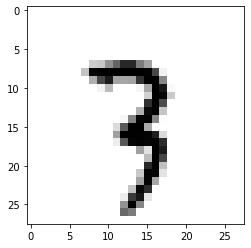

NN: 7: 0.6643471542169506


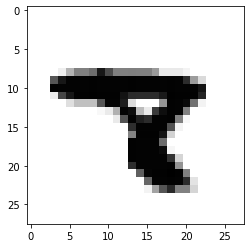

NN: 7: 0.9093535147759524


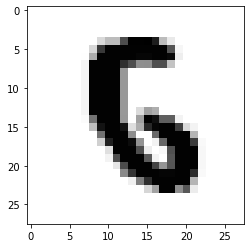

NN: 5: 0.6055331030574863


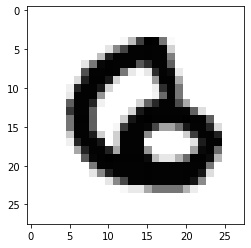

NN: 8: 0.08134459999800098


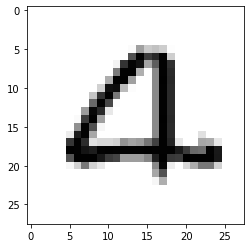

NN: 2: 0.9690593533587168


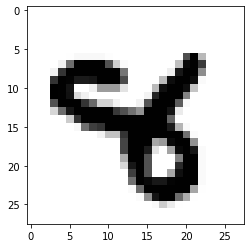

NN: 4: 0.9989223929241703


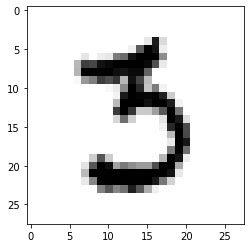

NN: 5: 0.9320532770547582


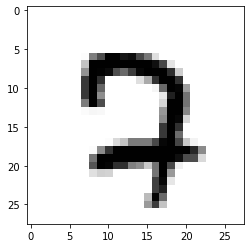

NN: 2: 0.6593716019277809


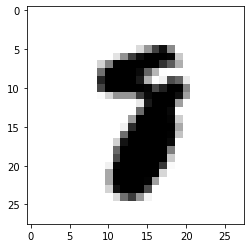

NN: 7: 0.9397324265557057


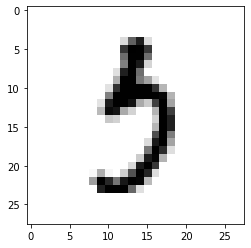

NN: 5: 0.47017954161395104


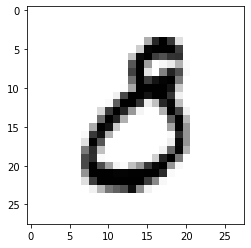

NN: 3: 0.7495795404755886


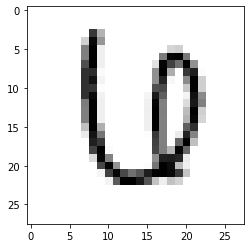

NN: 4: 0.1969568185991377


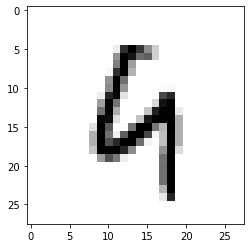

NN: 4: 0.4356011046583544


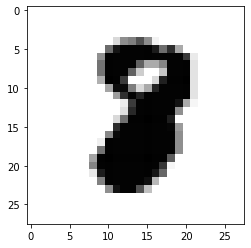

NN: 3: 0.4637930664459945


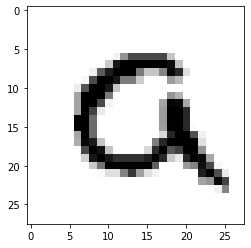

NN: 0: 0.42859445850121736


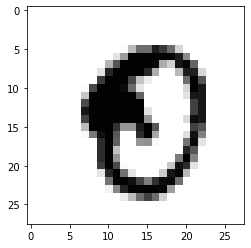

NN: 8: 0.9965405197306337


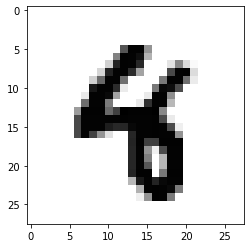

NN: 4: 0.9249809753728759


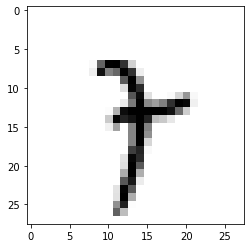

NN: 3: 0.2391443999384656


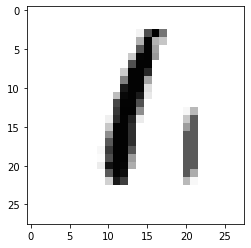

NN: 6: 0.987859197891545


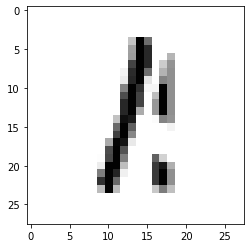

NN: 8: 0.9564095135886845


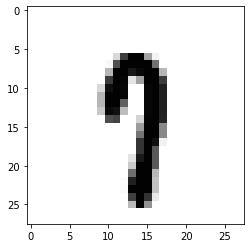

NN: 9: 0.5493409453907674


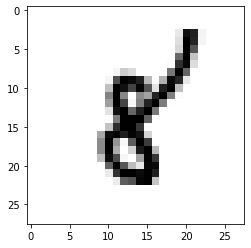

NN: 4: 0.3902753540456288


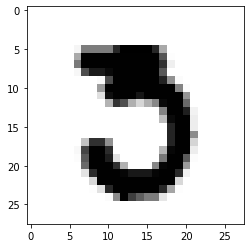

NN: 0: 0.38733675387209454


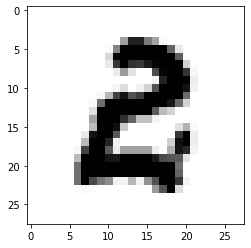

NN: 3: 0.4854265061501831


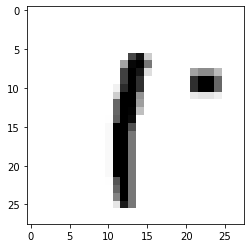

NN: 5: 0.8159770039633735


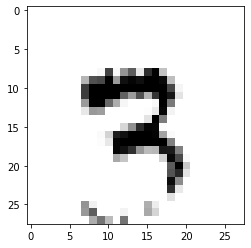

NN: 2: 0.3567355729365636


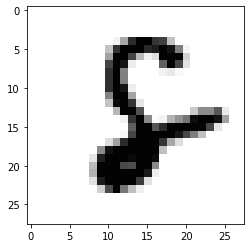

NN: 6: 0.6814995984476119


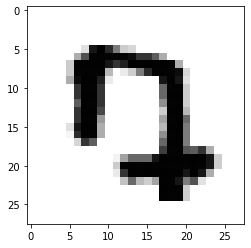

NN: 0: 0.9171038294989395


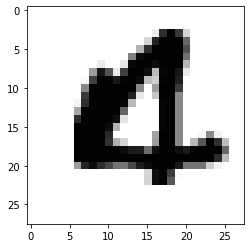

NN: 0: 0.5690913749965756


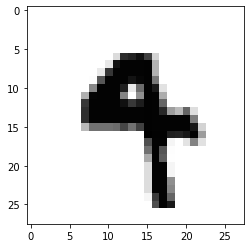

NN: 9: 0.7644936453482694


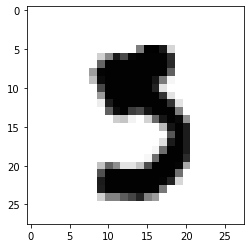

NN: 3: 0.8536249973279428


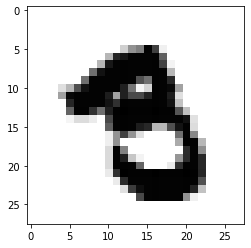

NN: 8: 0.9743768135304265


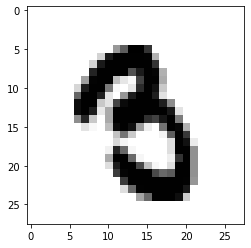

NN: 9: 0.7092925125101887


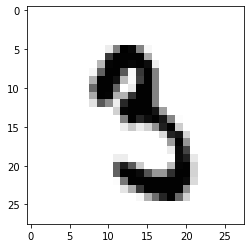

NN: 9: 0.5307897602774273


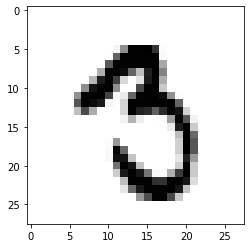

NN: 9: 0.5601464027086379


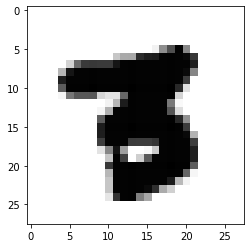

NN: 8: 0.7669327054460222


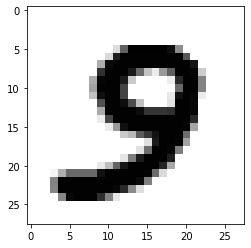

NN: 3: 0.6821822062841786


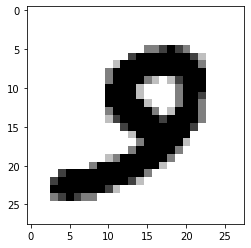

NN: 3: 0.9989763439899499


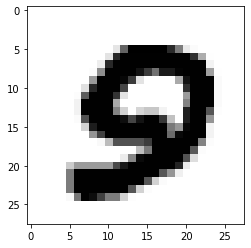

NN: 0: 0.10465800919855889


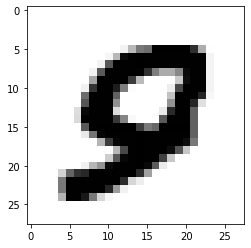

NN: 0: 0.29884963326900793


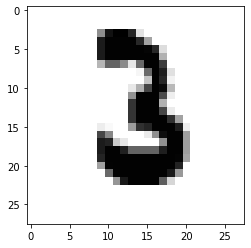

NN: 2: 0.6386959311022676


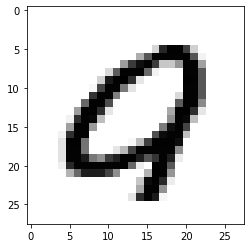

NN: 0: 0.9020491964425466


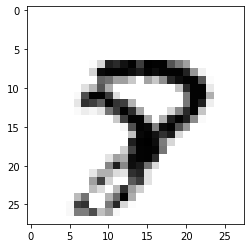

NN: 9: 0.8803250914387266


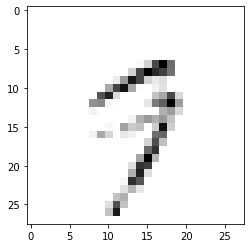

NN: 7: 0.9755496273670413


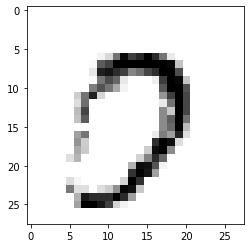

NN: 7: 0.7882450062507644


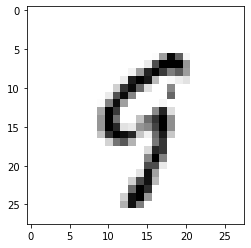

NN: 5: 0.9130723707021726


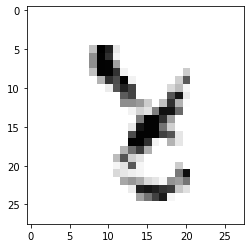

NN: 4: 0.9381519784516668


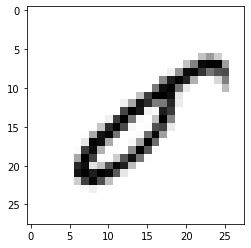

NN: 5: 0.13955818351157098


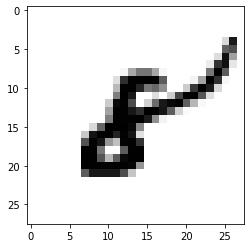

NN: 5: 0.3144681518767425


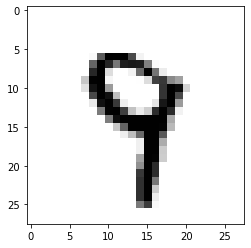

NN: 4: 0.2730767212616066


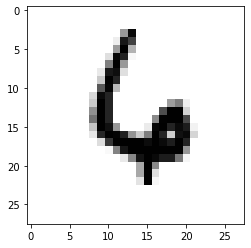

NN: 4: 0.8517274759419637


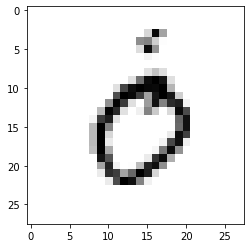

NN: 6: 0.5944202420866475


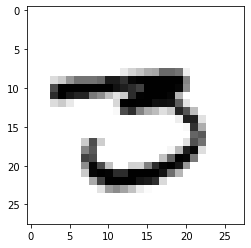

NN: 5: 0.5727499608795967


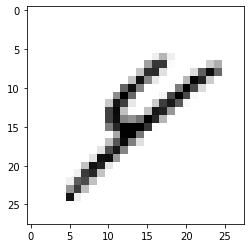

NN: 8: 0.8864627534406972


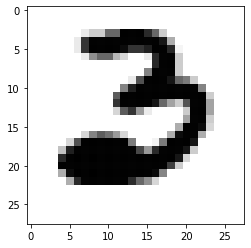

NN: 2: 0.7938958377195934


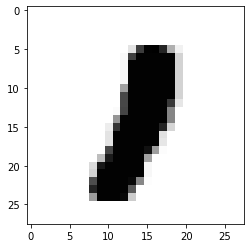

NN: 8: 0.13253071279445366


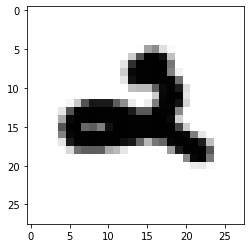

NN: 4: 0.849389789318061


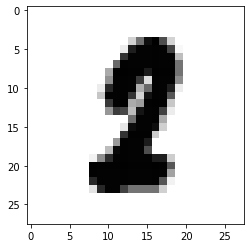

NN: 8: 0.535624348674579


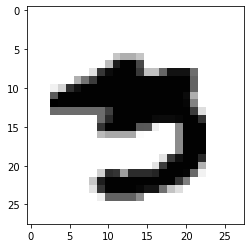

NN: 9: 0.14011720666202954


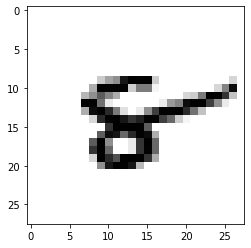

NN: 2: 0.18082849485579655


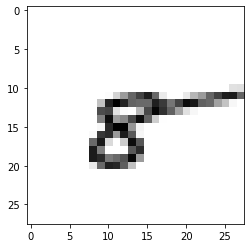

NN: 6: 0.6017580527626624


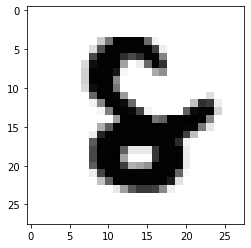

NN: 6: 0.5156602402575736


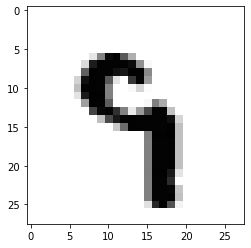

NN: 8: 0.7992526095234519


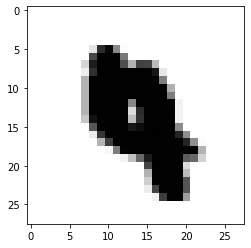

NN: 9: 0.543367483840281


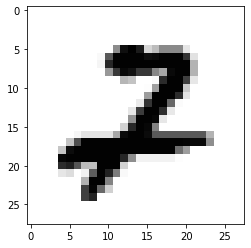

NN: 2: 0.9876712486370832


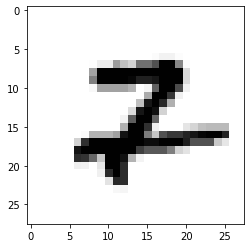

NN: 2: 0.8631423125656202


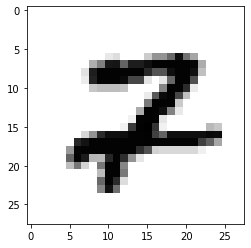

NN: 2: 0.9329800459418942


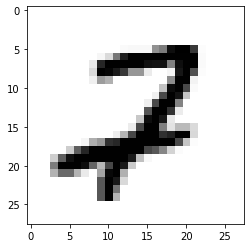

NN: 2: 0.9936558933263882


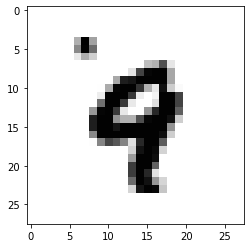

NN: 4: 0.9437288952079705


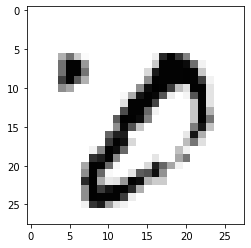

NN: 3: 0.8041133843166316


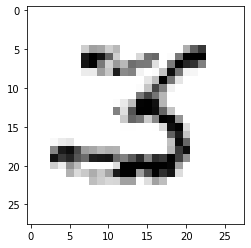

NN: 5: 0.9411909933890734


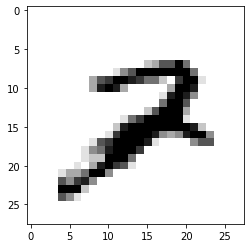

NN: 7: 0.5106510937905567


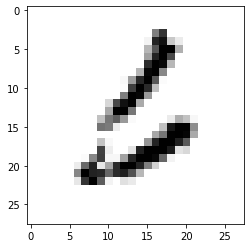

NN: 3: 0.9819601348865075


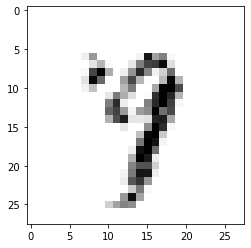

NN: 7: 0.9331209370283887


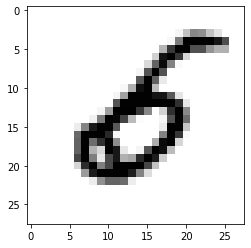

NN: 6: 0.9980747321665095


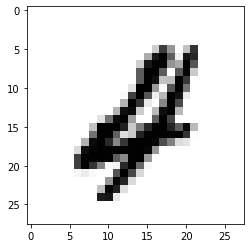

NN: 2: 0.39645521759738717


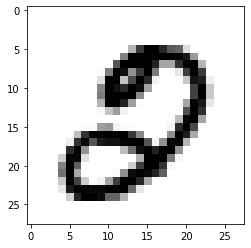

NN: 0: 0.2374259507464026


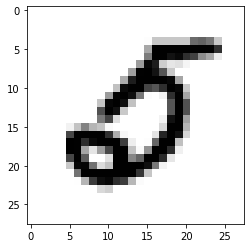

NN: 0: 0.7373588774925897


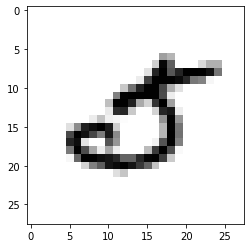

NN: 0: 0.6783582461154484


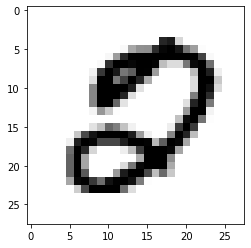

NN: 0: 0.3571959472869127


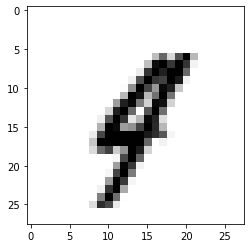

NN: 9: 0.6978152673783082


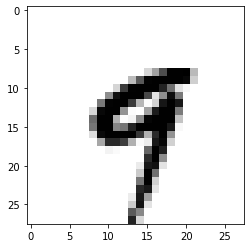

NN: 4: 0.9179789017401307


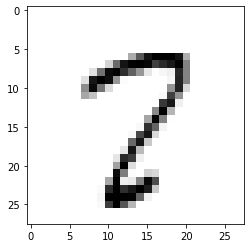

NN: 7: 0.360350571031269


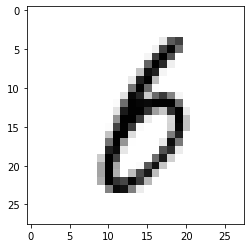

NN: 8: 0.2686071072395649


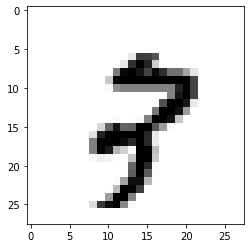

NN: 7: 0.5696532743722553


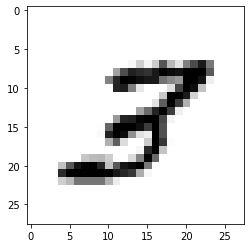

NN: 2: 0.21190849881813517


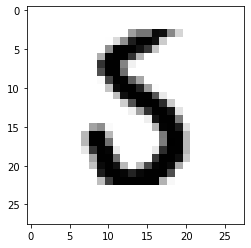

NN: 8: 0.4852035895505846


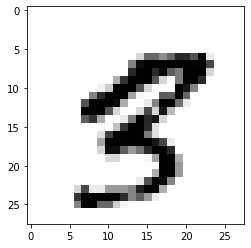

NN: 9: 0.451961971070503


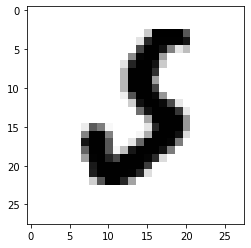

NN: 6: 0.5301778345310729


229

In [78]:
epoch_test_draw()

In [88]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [100]:
model = Sequential()

# add layers of net
model.add(Dense(100, input_dim=784,activation="sigmoid",kernel_initializer="random_normal", use_bias=True))
model.add(Dense(10,activation="sigmoid",kernel_initializer="random_normal", use_bias=False))
sgd = keras.optimizers.SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1000      
Total params: 79,500
Trainable params: 79,500
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
X_train = x_train.reshape(60000,784)
Y_train = np.zeros((len(y_train),10))
for n in range(len(y_train)):
    Y_train[n,y_train[n]]=1
model.fit(x=X_train, y=Y_train, batch_size=100,epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 16s 259us/step - loss: 1.8275 - accuracy: 0.6158
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.9247 - accuracy: 0.8355
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.5843 - accuracy: 0.8743
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.4567 - accuracy: 0.8922
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3934 - accuracy: 0.9016
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3532 - accuracy: 0.9097
Epoch 7/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3249 - accuracy: 0.9154
Epoch 8/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3048 - accuracy: 0.9189
Epoch 9/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2888 - accuracy: 0.9226
Epoch 10/10
60000/60000 [============================

In [ ]:
X_test = x_test.reshape(60000,784)
Y_test = np.zeros((len(y_test),10))
evaluate(x=X_test,y=Y_test,batch_size=None,)